# INSTALLING PACKAGES

In [16]:
install.packages('C50')
install.packages('rpart.plot')
install.packages('party')
install.packages("caret")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘matrixStats’, ‘multcomp’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’




# IMPORTING LIBRARIES

In [17]:
library(C50)
library(rpart)
library(rpart.plot)
library(party)
library(caret)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



# LOADING DATA

In [18]:
train = read.csv('https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv')
test = read.csv('https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv')

# TOP FIVE OBSERVATIONS

In [5]:
head(train)

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
,<lgl>,<dbl>,<int>,<int>,<dbl>
1,FALSE,0,397,1000,450
2,FALSE,0,403,500,225
3,FALSE,0,408,1000,450
4,FALSE,0,408,2000,900
5,FALSE,0,411,5000,2250
6,FALSE,0,413,5000,2250


In [6]:
head(test)

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
,<lgl>,<dbl>,<int>,<int>,<dbl>
1,FALSE,0,413,2000,900
2,FALSE,0,449,1000,450
3,FALSE,0,454,6000,2700
4,FALSE,0,456,1000,450
5,FALSE,0,457,1000,450
6,FALSE,0,457,8000,3600


# DATA SHAPE

In [19]:
print(dim(train))
print(dim(test))

[1] 150302      5
[1] 49698     5


# DATA TYPE

In [8]:
str(train)

'data.frame':	150302 obs. of  5 variables:
 $ Approval            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt.to.Income.Ratio: num  0 0 0 0 0 0 0 0 0 0 ...
 $ FICO.Score          : int  397 403 408 408 411 413 416 421 422 432 ...
 $ Request.Amount      : int  1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Interest            : num  450 225 450 900 2250 2250 2700 900 5400 4500 ...


In [9]:
str(test)

'data.frame':	49698 obs. of  5 variables:
 $ Approval            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt.to.Income.Ratio: num  0 0 0 0 0 0 0 0 0 0 ...
 $ FICO.Score          : int  413 449 454 456 457 457 459 461 461 462 ...
 $ Request.Amount      : int  2000 1000 6000 1000 1000 8000 8000 500 6000 19000 ...
 $ Interest            : num  900 450 2700 450 450 3600 3600 225 2700 8550 ...


# MISSING VALUES

In [11]:
sum(is.na(train))

[1] 0

In [12]:
sum(is.na(test))

[1] 0

# CHEKING DISTRIBUTION OF THE APPROVAL FEATURE

In [20]:
prop.table(table(train$Approval))


    FALSE      TRUE 
0.4994345 0.5005655 

In [21]:
prop.table(table(test$Approval))


    FALSE      TRUE 
0.5017103 0.4982897 

# CART MODEL

In [52]:
set.seed(123)
cart = rpart(Approval~., data=train,  method="class")

In [77]:
cart

n= 150302 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150302 75066 TRUE (0.49943447 0.50056553)  
  2) FICO.Score< 659.5 46002  1808 FALSE (0.96069736 0.03930264) *
  3) FICO.Score>=659.5 104300 30872 TRUE (0.29599233 0.70400767)  
    6) Debt.to.Income.Ratio>=0.305 12873  1679 FALSE (0.86957197 0.13042803) *
    7) Debt.to.Income.Ratio< 0.305 91427 19678 TRUE (0.21523182 0.78476818) *

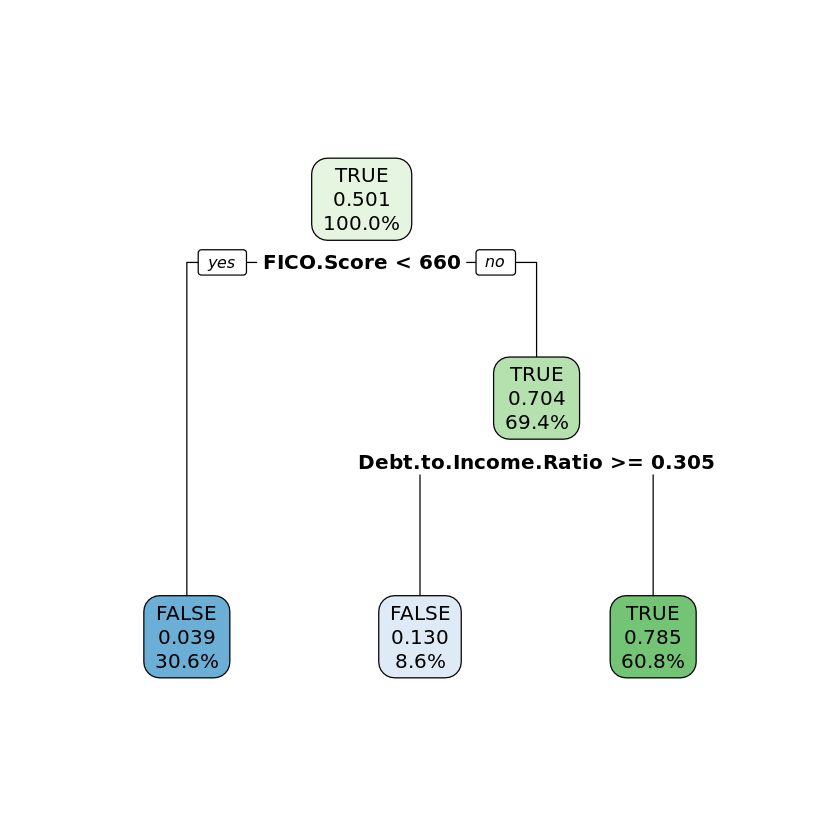

In [78]:
rpart.plot(cart, digits = 3)

Note:
- If FICO score is greater than 660 & Debt to income ratio >=0.305 then loan approved
- If FICO score is greater than 660 but Debt to income ratio <0.305 then loan rejected
- If FICO score is less than 660 then loan rejected

In [55]:
print(cart$variable.importance)

          FICO.Score Debt.to.Income.Ratio             Interest 
          28208.7726            9664.7302             179.6698 
      Request.Amount 
            179.6698 


# PREDICTION ON TEST DATA

In [71]:
pred <- predict(cart, test, 'class')

In [72]:
pred[1:5]

1     2     3     4     5 
FALSE FALSE FALSE FALSE FALSE 
Levels: FALSE TRUE

# CONFUSION MATRIX

In [58]:
confusionMatrix(table(test$Approval, pred))

Confusion Matrix and Statistics

       pred
        FALSE  TRUE
  FALSE 18314  6620
  TRUE   1171 23593
                                        
               Accuracy : 0.8432        
                 95% CI : (0.84, 0.8464)
    No Information Rate : 0.6079        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6867        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9399        
            Specificity : 0.7809        
         Pos Pred Value : 0.7345        
         Neg Pred Value : 0.9527        
             Prevalence : 0.3921        
         Detection Rate : 0.3685        
   Detection Prevalence : 0.5017        
      Balanced Accuracy : 0.8604        
                                        
       'Positive' Class : FALSE         
                                        

# C5

In [51]:
train$Approval = as.factor(train$Approval)

In [79]:
c5 = C5.0(train[,-1], train[,1], control = C5.0Control(minCases=1000))

In [80]:
c5


Call:
C5.0.default(x = train[, -1], y = train[, 1], control = C5.0Control(minCases
 = 1000))

Classification Tree
Number of samples: 150302 
Number of predictors: 4 

Tree size: 8 

Non-standard options: attempt to group attributes, minimum number of cases: 1000


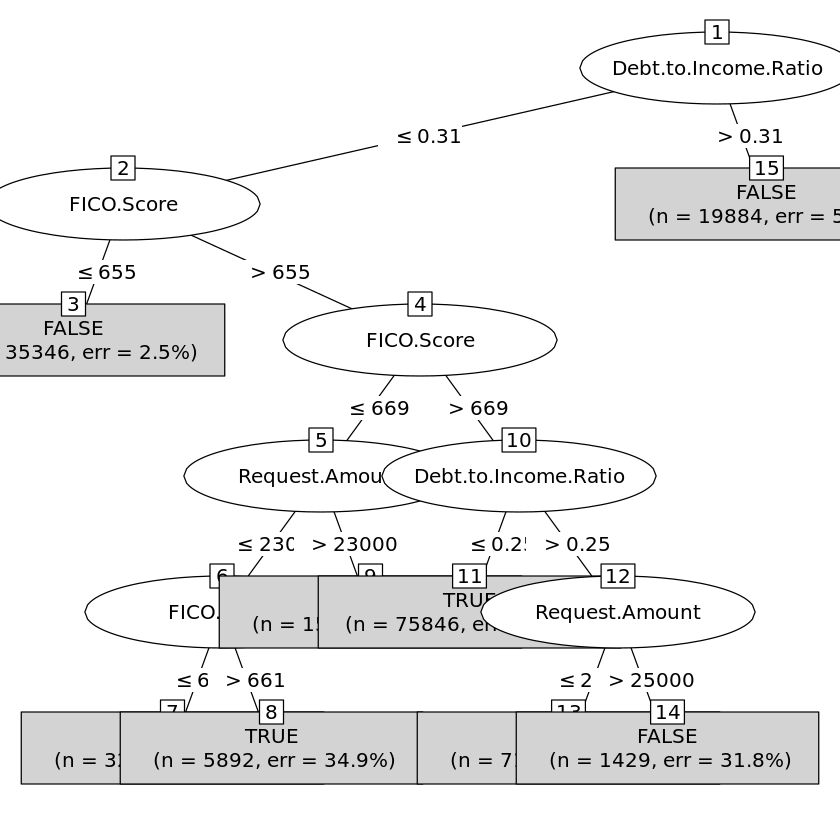

In [86]:
plot(c5, type = 'simple')

Note:
- If Debt to income ratio is greater than 0.31 then rejected a loan
- If Debt to income ratio is less than or equals to 0.31 but FICO Score is less than or equals to 655 then rejected a loan
- If Debt to income ratio is less than or equals to 0.31 and FICO Score is greater than 655:
    - FICO range 655-669 & Request amount is less than 23000 but FICO Score is greater than 661 then Approved Loan

# PREDICTION ON TEST DATA

In [87]:
pred2 <- predict(c5, test)

In [88]:
pred2[0:5]

[1] FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

# CONFUSION MATRIX

In [89]:
confusionMatrix(table(test$Approval, pred2))

Confusion Matrix and Statistics

       pred2
        FALSE  TRUE
  FALSE 18842  6092
  TRUE   1504 23260
                                         
               Accuracy : 0.8472         
                 95% CI : (0.844, 0.8503)
    No Information Rate : 0.5906         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6945         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9261         
            Specificity : 0.7925         
         Pos Pred Value : 0.7557         
         Neg Pred Value : 0.9393         
             Prevalence : 0.4094         
         Detection Rate : 0.3791         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.8593         
                                         
       'Positive' Class : FALSE          
                                         

# COMPARISION

							
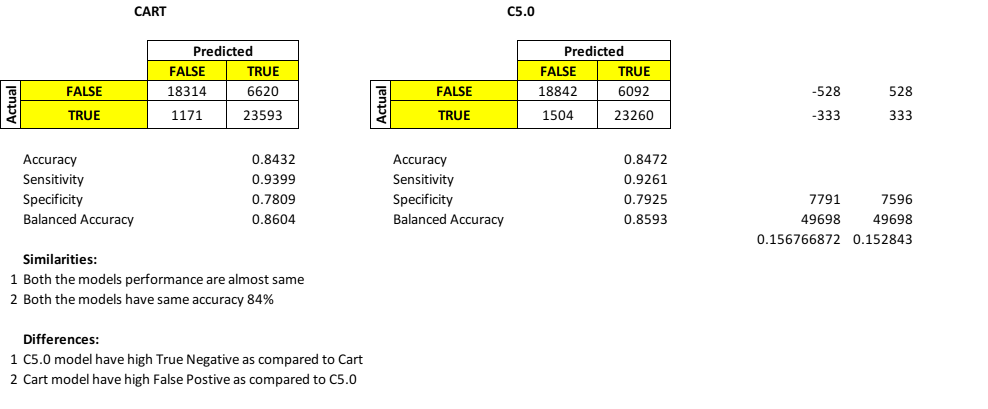